<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/MachinLearning/ML_day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ML_day7 정리

• 나이브 베이즈 - 새로운 사건의 확률을 계산하기 전에 이미 일어난 사건을 고려하는 것을 전제로 하는 조건부 확률을 분류에 적용한 머신러닝 알고리즘

• 사이킷런 나이브 베이즈 구현 클래스 - GaussianNB, MultinomialNB(다항 나이브 베이즈, 텍스트 분류), BernoulliNB(이진 특성으로 나이브 베이즈 분류, 텍스트분류)

• 비지도 학습 - 레이블이 없는 데이터 안에서 구조를 발견하는 학습

• k-Means - 처음에 지정하는 중심점의 위치를 무작위로 결정하기 때문에 최적의 클러스터로 묶어주는 알고리즘

• k-Means++ - 처음에 지정하는 중심점의 위치를 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 중심점으로 지정, 최적의 클러스터로 묶어주는 알고리즘(k-Means보다 알고리즘이 수렴하는 속도가 빠르다)

• 이동평균 - 클러스터 수나 모양을 가정하지 않고 샘플 데이터를 군집으로 나눌 때 사용  
거리중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 족으로 군집 중심점을 이동하면서 군집화를 수행  
컴퓨터 비전영역


In [5]:
#이동평균 실습 예제

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

#군집 모의 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.7, random_state=0)

#X,y값 확인
print(X[:5])
print(y[:5])

print('label 유형:', np.unique(y))  #center가 3이라서

[[-1.67173659  3.5340075 ]
 [ 0.73273157  4.41323161]
 [ 1.08473328  4.56850109]
 [-1.45849654  3.32594984]
 [ 1.1850368   5.23225746]]
[2 0 0 2 0]
label 유형: [0 1 2]


In [6]:
#bandwidth는 샘플이 이동 방향을 결정하기 위해 사용하는 면적(커널)의 반경을 지정
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('[bandwidth=0.8] cluster labes 유형:', np.unique(cluster_labels))

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('[bandwidth=1] cluster labes 유형:', np.unique(cluster_labels))

[bandwidth=0.8] cluster labes 유형: [0 1 2 3 4 5]
[bandwidth=1] cluster labes 유형: [0 1 2]


#### Gaussian - 좌우 대칭형의 데이터 분포  

• GMM - 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식(가우시안 혼합 모델)  

• GMM으로 군집화를 구행하려면 모수를 추정 방법  
1. 개별 정규 분포의 평균과 분산
2. 각 데이터가 어떤 정규 분포에 해당하는지의 확률
EM(Expectation and Maximization)

• 전체 데이터 세트는 서로 다른 정규분포를 가진 여러 가지 확률 분포 곡선으로 구성되어 있으면, 정규분포에 기반에 군집화를 수행  
• 여러 개의 정규 분포 곡선을 추출 한 뒤, 개별 데이터들이 여러 정규 분포 중 어떤 정규분포에 속하는지 결정 => 모수 추정



In [12]:
#GMM 실습 예제

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

# GMM 적용
from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(iris.data)

# GMM 후 클러스터링 레이블을 따로 설정
irisDF['gmm_cluster'] = gmm_labels

# 실제 레이블과 GMM 클러스터링 후 레이블과 비교해보기(두 레이블 수치가 동일해야 똑같은 레이블 의미 아님!)
print(irisDF.groupby('target')['gmm_cluster'].value_counts())

target  gmm_cluster
0       2              50
1       0              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


• DBSCAN - 특정 공간 내에 데이터 밀도 차이를 기반으로 군집화를 수행  
데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적

• DBSCAN 구성 중요한 파라미터:  
epsilon - 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역  
min points - 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수  

• 입실론 주변 영역 내에 포함되는 최소 데이터 개수 충족 여부에 따라 정의되는 데이터 포인트:  
핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 충족하는 해당 데이터

이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터

경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 불충족 AND 핵심 포인트를 이웃하는 해당 데이터

잡음 포인트(Noise Point): 주변 영역 내에 최소 데이터 개수 불충족 AND 핵심 포인트 이웃하지 않는 해당 데이터

In [15]:
#DBSCAN 실습 예제

from sklearn.datasets import make_moons

x,y = make_moons(n_samples=300, noise=0.05, random_state=42)
df= pd.DataFrame(x)
print(df.head())
print('labels 유형:', np.unique(y))

          0         1
0  0.622519 -0.372101
1  1.904269 -0.136303
2 -0.069431  0.456117
3  0.933899  0.237483
4  1.180360 -0.490847
label 유형: [0 1]


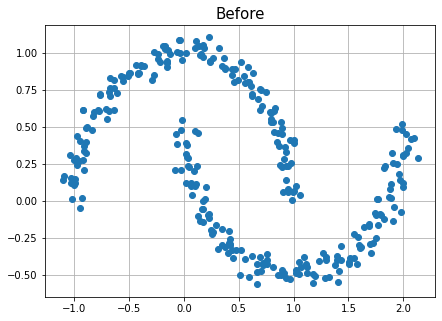

In [16]:
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df[0], df[1], "o")
plt.grid()
plt.show()

In [18]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.3, min_samples=5).fit(df.values)
df['cluster_db'] = db_scan.labels_
df.head()
print('labels 유형:', np.unique(df['cluster_db']))

labels 유형: [0 1]


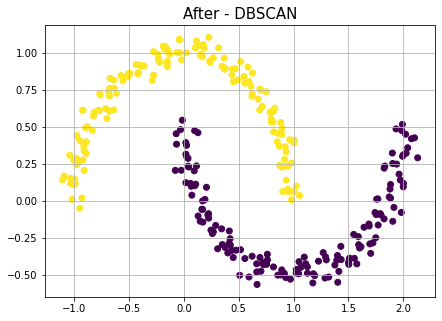

In [19]:
plt.figure(figsize=(7,5))
plt.title("After - DBSCAN", fontsize=15)
plt.scatter(df[0],df[1],c=df['cluster_db'])
plt.grid()
plt.show()

### ML_day8 시작

### 차원 축소

• 많은 피처로 구성된 다차원의 데이터 셋을 차원을 축소하여 새로운 차원의 데이터 세트를 생성하는 것

• 수백 개 이상의 피처로 구성된 데이터 셋은 적은 차원에서 학습한 모델보다 예측 신뢰도가 떨어지고, 피처가 많을 경우 개별 피처간 상관 관계가 높을 가능성이 커진다.

• 선형 모델에서는 입력한 변수들 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측이 성능이 낮아지게
되므로 꼭 필요한 과정이다.

• 차원 축소를 3차원 이하로 하게 된다면 시각적으로 데이터를 압축하여 표현하기도 용이 - 시각화 (Visualization)

• 학습 데이터의 크기가 줄어들면 학습에 필요한 처리 능력도 줄일 수 있다. - 노이즈 제거, 메모리 절약, 모델 성능 향상

• 피처 선택 (Feature Selection) : 특정 피처에 종속성이 강한 불필요한 피처는 제거하는 방법
데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것

• 피처 추출 (Feature extraction) : 기존 피처를 저차원의 중요 피처로 압축하여 추출하는 것(기존 피처와는 완전히
다른 값이 되어버림)

• PCA, LDA, SVD, NMF

#### PCA(Principal Component Analysis)- 축소하고자 하는 데이터의 변동성이 가장 큰 방향으로 축을 설정해 데이터를 표현

• 여러 변수 간에 존재하는 상관관계를 이용해 대표하는 주성분을 추출해 차원을 축소

• 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소

• 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식

• 축소하고자 하는 데이터 간의 공분산행렬을 구하고 고유벡터를 추출해 PCA값을 산출

In [20]:
#pca차원축소 실습 예제

iris = load_iris()
print(iris.data.shape)
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
#StandardScaler로 데이터 Normalization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
result=scaler.fit_transform(data)
data_scaled=pd.DataFrame(result, columns=iris.feature_names)
data_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [23]:
#2차원으로 차원축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

iris_pca = pd.DataFrame(result, columns=['pca_component_1', 'pca_component_2'])
iris_pca.head()

,pca_component_1,pca_component_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


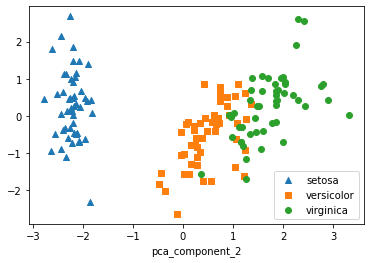

In [24]:
# 시각화를 위해서 target column을 추가

iris_pca['target'] = iris.target

#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_pca[iris_pca['target'] == i]['pca_component_1']
    y_axis_data = iris_pca[iris_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.xlabel('pca_component_2')
plt.show()

In [28]:
#두 축이 원본 데이터의 변동성을 전체 변동성에서 얼마나 반영하는지 비울
print(pca.explained_variance_ratio_) #72%, 22%정도 = 전체 데이터의 변동성을 95% 설명할 수 있다

[0.72962445 0.22850762]


In [29]:
#차원 축소 전,후의 정확률 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=100)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
원본 데이터 평균 정확도 0.9666666666666668


In [27]:
pca_X = iris_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


UCI Machin Learning Repository에 있는 신용카드 고객 dataset  
dataset은 23개의 속성 dataset  
(3000개의 record, 'default payment next month' 속성이 target값으로 다음달 연체 여부를 의미하며 '연체'일 경우 1, '정상납부'일 경우 0)

In [31]:
import seaborn as sns

# header로 의미없는 첫행 제거, iloc로 기존 id 제거
df = pd.read_excel('credit_card_clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

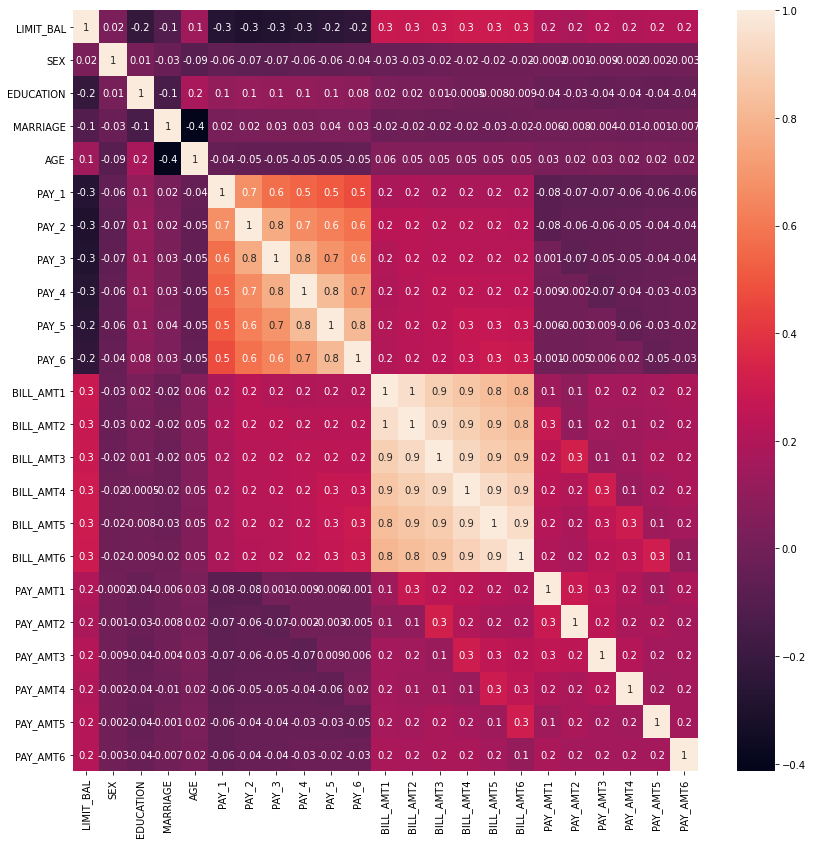

In [33]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

#BILL_AMT1~ BILL_AMT6 6개의 속성들끼리의 상관도가 대부분 0.9이상으로 매우 높음
#PCA를 통해 BILL_AMT1~ BILL_AMT6 6개의 속성을 2개의 component로 변환한 후 개별 component의 변동성 비율 출력

In [34]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [35]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [36]:
# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7923 0.7954 0.8036]
PCA 변환 데이터 셋 평균 정확도:0.7971


#### LDA(Linear Discriminant Analysis) 선형 판별 분석

• 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소

• 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 축을 설정

• 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다

• 특징 공간상에서 클래스를 최대화하는 주축으로 사상시켜 차원을 축소

• 클래스간 분산과 클래스내분산 의 비율을 최대화하는 방식으로 데이터에 대한 특징벡터의 차원을 축소

In [46]:
#LDA 차원축소 실습

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)

iris_lda = lda.transform(iris_scaled) #LDA를 활용해 차원축소
print(iris_lda.shape)
print(lda.explained_variance_ratio_)

(150, 2)
[0.9912126 0.0087874]


In [48]:
lda_columns=['lda_com_1','lda_com_2']
iris_df = pd.DataFrame(iris_lda,columns=lda_columns)

rcf = RandomForestClassifier(random_state=156)
scores_lda = cross_val_score(rcf, iris_df, iris.target, scoring='accuracy', cv=5)
print('LDA 변환 데이터 교차 검증 개별 정확도:', scores_lda)
print('LDA 변환 데이터 평균 정확도', np.mean(scores_lda))

LDA 변환 데이터 교차 검증 개별 정확도: [1.         1.         0.9        0.93333333 1.        ]
LDA 변환 데이터 평균 정확도 0.9666666666666666


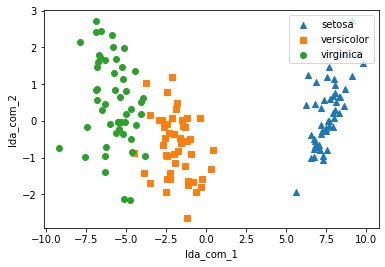

In [49]:
iris_df['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['lda_com_1']
    y_axis_data = iris_df[iris_df['target']==i]['lda_com_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_com_1')
plt.ylabel('lda_com_2')
plt.show()

#### SVD(Singular Value Decomposition) 특이값 분해
PCA와 유사한 행렬 분해 기법 이용

• 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있습니다.

• 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가집니다.

A = Original Data  
U, V = 직교 행렬  
S = 대각 행렬  

1. 데이터를 행렬로 묶어서 A라고 하고  
2. 각 열의 평균을 0으로 만듬
3. V의 열벡터는 데이터들이 사영시켰을 때 분산이 가장 커지는 축들을 열로 표현된 것
4. AV=US의 행 벡터는 새로운 축에 대한 좌표 표현
5. AV에서 적당한 크기의 열로 잘라내어 (중요한 정보를 유지) 차원을 축소

A =USV^T 식에서 V가 축에 대한 의미를 가짐  
V의 각 열들이 축이 되며, 축들 중에서 가장 왼쪽 즉, 0번째 데이터들이 분산이 제일 커지도록 하는 축이된다


SVD 종류  
• 축소하는 것 없이 단순히 분할만 하며 원본 행렬로 복구가 가능한 Full SVD  

• 차원을 축소하지만 0인 값들만 축소하므로 원본 행렬로 복구가 가능한 Compact SVD  

• 0이 아닌 요소값들(주로 데이터에서 중요하지 않은 부분)을 제거하여 축소하기 때문에 원본 행렬로 복구하기는 힘든 Truncated SVD

Text(0, 0.5, 'Comp2')

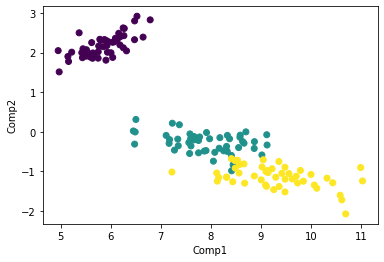

In [51]:
#sklearn에서 제공하는 Truncated SVD

from sklearn.decomposition import TruncatedSVD

iris = load_iris()
iris_features = iris.data

#2개의 특이값으로 분할
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_features)
iris_tsvd = tsvd.transform(iris_features)

#분할 후 데이터 산포도 시각화
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('Comp1')
plt.ylabel('Comp2')
 

In [57]:
tsvd_columns = ['tsvd_com1', 'tsvd_com2']
iris_df = pd.DataFrame(data=iris_tsvd, columns=tsvd_columns)
rcf = RandomForestClassifier(random_state=156)
scores_lda = cross_val_score(rcf, iris_df, iris.target, scoring='accuracy', cv=5)
print('TSVD 변환 데이터 교차 검증 개별 정확도:', scores_lda)
print('TSVD 변환 데이터 평균 정확도:', np.mean(scores_lda))

TSVD 변환 데이터 교차 검증 개별 정확도: [1.         0.96666667 0.96666667 0.96666667 1.        ]
TSVD 변환 데이터 평균 정확도: 0.9800000000000001


#### NMF(Non-negative Matrix Factorization)

• 원본 행렬 내의 모든 요소값들이 모두 0값 이상의 양수일 때 좀 더 간단하게 양수 행렬로 분할할 수 있는 기법

• Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation)방식의 변형

• 원본 행렬 내의 모든 원소 값이 모두 양수(0이상)라는 게 보장되면, 좀 더 간단하게 두 개의 기반 양수 행렬로 분해 될 수 있는 기법을 지칭한다.

NMF 변환 데이터 교차 검증 개별 정확도: [0.96666667 1.         0.93333333 0.93333333 1.        ]
NMF 변환 데이터 평균 정확도: 0.9666666666666668


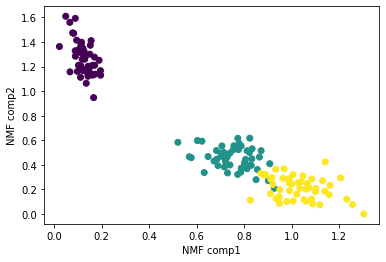

In [58]:
from sklearn.decomposition import NMF

iris = load_iris()
iris_features = iris.data

nmf = NMF(n_components=2)
iris_nmf = nmf.fit_transform(iris_features)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF comp1')
plt.ylabel('NMF comp2')

nmf_columns = ['nmf_com1', 'nmf_com2']
iris_df = pd.DataFrame(data=iris_nmf, columns=nmf_columns)
rcf = RandomForestClassifier(random_state=156)
score_nmf = cross_val_score(rcf, iris_df, iris.target, scoring='accuracy', cv=5)
print('NMF 변환 데이터 교차 검증 개별 정확도:', score_nmf)
print('NMF 변환 데이터 평균 정확도:', np.mean(score_nmf))

### Boosting

• 오분류된 데이터에 초점을 맞추어 더 많은 가중치를 주는 방식

• 초기에는 모든 데이터가 동일한 가중치를 가지지만, 각 round가 종료된 후 가중치와 중요도를 계산

• 복원추출 시에 가중치 분포를 고려

• 오분류된 데이터가 가중치를 더 얻게 됨에 따라 다음 round에서 더 많이 고려됨

• AdaBoost, LPBoost, TotalBoost, BrownBoost, MadeBoost, LogitBoost, Gradient Boosting

하드보팅(Hard Voting)과 소프트보팅(Soft Voting)

• 하드보팅을 이용한 분류 - 다수결 원칙과 비슷합니다.

• 소프트 보팅 - 각 알고리즘이 레이블 값 결정 확률을 예측해서, 이것을 평균하여 이들 중 확률이 가장 높은 레이블 값을 최종 값으로 예측

In [68]:
#사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 156)

vo_clf.fit(X_train , y_train) # VotingClassifier 학습/예측/평가.
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train , y_train)
  pred = classifier.predict(X_test)
  class_name= classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#### AdaBoostClassifie

• 결정 트리나 랜덤 포레스트보다 더 높은 성능를 가진 모델

• AdaBoost 부스팅 형식은 이전 모델이 잘못 예측한 샘플에 높은 우선순위를 부여하는 식으로 약한 모델을 연속적으로 훈련합니다.

• 최종 결과는 예측 측면에서 더 어려운 샘플에 초점을 맞추는 약한 모델들을 모은 앙상블 모델입니다.


• AdaBoostClassifier와 AdaBoostRegressor 클래스

• AdaBoostClassifier - 예측할 때 각 학습기에 부여된 가중치를 더하여 가장 높은 점수의 클래스가 예측 결과가 됩니다.

• AdaBoostRegressor - 개별 학습기의 결과를 정렬하여 예측기 가중치의 누적값이 중간 지점에 있는 결과를 사용

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
iris = datasets.load_iris() # 데이터 로드

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) # 에이다부스트 트리 분류기의 객체 생성
model = abc.fit(X_train, y_train)  # 모델 훈련
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.9111111111111111


In [72]:
from sklearn.svm import SVC
from sklearn import datasets
iris = datasets.load_iris() # 데이터 로드

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC(probability=True, kernel='linear')
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1) # 에이다부스트 트리 분류기의 객체 생성
model = abc.fit(X_train, y_train)  # 모델 훈련
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.9777777777777777


#### Gradient Boost Machine(GBM)

• Gradient Boost Machine(GBM) - AdaBoost와 달리 이전 학습기가 만든 잔여 오차를 경사 하강법을 이용하여 가중
치 업데이트하여 새로운 트리를 훈련하는 방식으로 앙상블 모델을 구성하여 높은 성능을 냅니다.

• GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게 되고, 시간이 오래 걸린다는 단점이 있습니다.

• GradientBoostingClassifier -약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원도지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요합니다.

In [80]:
# Gradient Boost Machine(GBM)

import time
from sklearn.ensemble import GradientBoostingClassifier

iris = datasets.load_iris() # 데이터 로드
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9333
GBM 수행 시간: 0.2초


In [83]:
#GridSearchCV를 통한 GBM의 하이퍼파라미터 튜닝

from sklearn.model_selection import GridSearchCV

param = {
'n_estimators' : [100, 500],
'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=5, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s finished


최적 하이퍼 파라미터: 
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.9524
GBM 정확도: 0.9333


#### XGBoost (Extreme Gradient Boosting)

• 일반적으로 분류의 회귀 영억에서 뛰어난 예측 성능을 발휘한다

• XGBoost 는 병령 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장한다

• 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가진다

• max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점이 있다.

• 반복 수행 시마다 내부적으로 학습 데이터 셋과 평가 데이터 세세에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있다.

• 결손값을 자체 처리할 수 있다. .

In [88]:
!pip install -q xgboost
import xgboost

In [90]:
dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.iloc[:3,:6]

print(dataset.target_names)
print(cancer_df['target'].value_counts())
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64
(455, 30) (114, 30)


In [ ]:
# 사이킷런 래퍼 XGBoost 에서도 조기 중단을 수행할 수 있다.
# 조기 중단 관련한 파라미터를 fit()에 입력하면 된다.
# early_stopping_roundss : 조기 중단 관련 파라미터는 평가 지표가 향상될 수 있는 반복 횟수를 정의
# eval_metric : 조기 중단을 위한 평가 지표
# eval_set : 성능 평가를 수행할 데이터 셋
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score #평가 지표 함수
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve # 평가 지표 함수 2


xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred) 
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

#결과가 너무 길어 실행은 하지 않았습니다

#### LightGBM

• 마이크로소프에서 개발한 모델로서 XGBoost보다 더 빠른 학습과 예측 수행 시간을 가지고 있고 더 작은 메모리 사용량을 가진다.

• 카테고리형 피처의 자동 변환과 최적 분할 ( 원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할을 수행)

• LightGBM의 경우 트리 분할 방식이 기존 XGBoost를 포함한 트리 생성 방식과 다르게 리프 중심 트리 분할을 통해ㅠ빠르고 정확한 학습,예측이 가능

• XGBoost의 장점은 계승하고 단점은 보완하는 방식으로 개발되었다.

• 적은(10,000건 이하)의 데이터 셋에 적용할 경우 과적합 발생 쉽다.

• 트리의 균형을 맞추지 않고 최대 손실값(max delta loss)를 가지는 리프 노드를 지속적으로 분할하며 트리 깊이 확장하면서 트리의 깊이가 깊어지고 비대칭적 규칙 트리 생성한다.

• 학습을 반복할 수록 균형 트리분할방식보다 예측 오류 손실을 최소화할 수 있다

In [ ]:
import lightgbm
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data

y_label = dataset.target
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400 )
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds =10, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

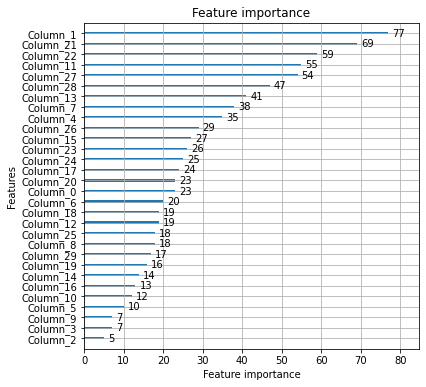

In [113]:
def get_clf_eval(y_test, y_pred) :
  confusion = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  F1 = f1_score(y_test, y_pred)
  AUC = roc_auc_score(y_test, y_pred)
  print('오차행렬: ', confusion)
  print('정확도: {:.4f}'.format(accuracy))
  print('정밀도: {:.4f}'.format(precision))
  print('재현율: {:.4f}'.format(recall))
  print('F1: {:.4f}'.format(F1))
  print('AUC: {:.4f}'.format(AUC))

from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
plot_importance(lgbm_wrapper, ax=ax)